In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#non fraud class=0, and fraud class =1
# Value counts for target column
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

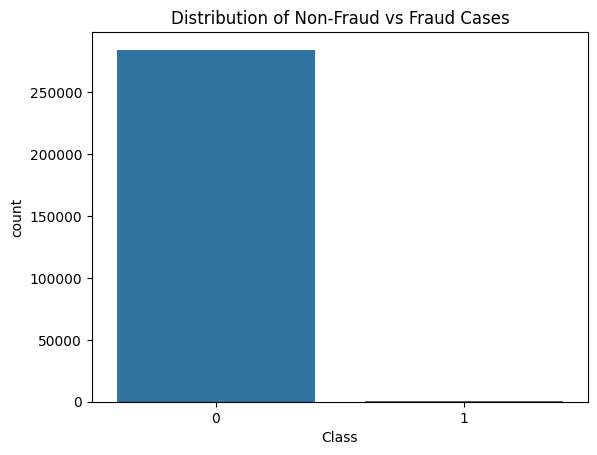

In [8]:
sns.countplot(x='Class', data=df)
plt.title("Distribution of Non-Fraud vs Fraud Cases")
plt.show()

In [9]:
# Show the range of each column
print(df.describe().T[['min', 'max']])
#USEEEE THIIIIIISSSS FOR INPUUTT(reminderrrr)

               min            max
Time      0.000000  172792.000000
V1      -56.407510       2.454930
V2      -72.715728      22.057729
V3      -48.325589       9.382558
V4       -5.683171      16.875344
V5     -113.743307      34.801666
V6      -26.160506      73.301626
V7      -43.557242     120.589494
V8      -73.216718      20.007208
V9      -13.434066      15.594995
V10     -24.588262      23.745136
V11      -4.797473      12.018913
V12     -18.683715       7.848392
V13      -5.791881       7.126883
V14     -19.214325      10.526766
V15      -4.498945       8.877742
V16     -14.129855      17.315112
V17     -25.162799       9.253526
V18      -9.498746       5.041069
V19      -7.213527       5.591971
V20     -54.497720      39.420904
V21     -34.830382      27.202839
V22     -10.933144      10.503090
V23     -44.807735      22.528412
V24      -2.836627       4.584549
V25     -10.295397       7.519589
V26      -2.604551       3.517346
V27     -22.565679      31.612198
V28     -15.43

In [10]:
# Check correlation with target (fraud)
corr = df.corr()['Class'].sort_values(ascending=False)
print(corr)
#plain correlation not matrix ones

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate input features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [12]:
# Scale the data (Time and Amount are usually not scaled)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [13]:
# Train-test split (stratify=y helps maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)

Shape of training data: (199364, 30)
Shape of test data: (85443, 30)


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# First, split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the new distribution
from collections import Counter
print(f"Original dataset shape: {Counter(y_train)}")
print(f"Resampled dataset shape: {Counter(y_train_resampled)}")


Original dataset shape: Counter({0: 227451, 1: 394})
Resampled dataset shape: Counter({0: 227451, 1: 227451})


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


a common function for evaluating the model:
                  this can be through performance metrics like accuracy
                  
                  , score roc, auc, scores, and classification report

In [17]:
def evaluate_model(name, y_test, y_pred, y_probs):
    print(f"\n🧠 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_probs))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')


**LOGISTIC REGRESSION:**
Logistic regression is a widely used statistical method for binary classification problems, where the goal is to predict one of two possible outcomes. In the context of this project, logistic regression serves as a fundamental tool to model the probability that a given input belongs to a particular category. It does so by applying a sigmoid function to a linear combination of input features, producing an output between 0 and 1, which can be interpreted as a probability. This makes it especially useful for decision-making tasks where outcomes can be clearly defined, such as "yes" or "no," "success" or "failure," or "positive" or "negative" predictions. Logistic regression is not only interpretable but also computationally efficient, making it a strong baseline model for classification.



c:\Users\Admin\Desktop\python_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🧠 Model: Logistic Regression
Accuracy: 0.9741757663003405
ROC AUC Score: 0.9720758731179585
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



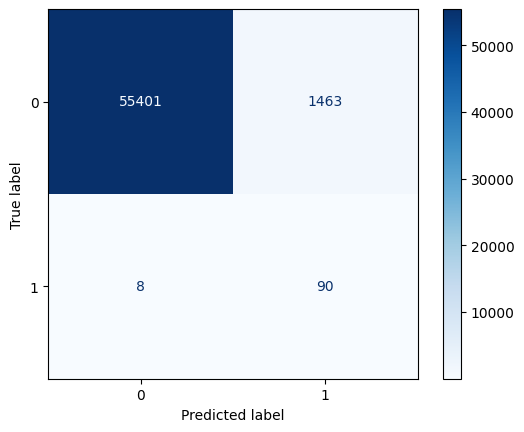

In [18]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight helps with imbalance
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_probs_log = log_model.predict_proba(X_test)[:, 1]
#It returns probabilities instead of just the class predictions.
#[:,1] row all selection and fraud column selection


evaluate_model("Logistic Regression", y_test, y_pred_log, y_probs_log)
Accuracy_log = metrics.accuracy_score(y_test, y_pred_log)
log_roc_value = roc_auc_score(y_test, y_probs_log)

**Decision Tree Classifier:** is a popular supervised learning algorithm used for both classification and regression tasks, but it's especially effective for classification problems. In this project, the decision tree serves as a model that splits the data based on feature values to form a tree-like structure of decisions. Each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a predicted class label. This structure allows the model to capture non-linear relationships and make interpretable decisions by following a clear path from root to leaf. Decision trees are intuitive, require minimal data preprocessing, and provide visual insights into the decision-making process, making them a strong choice for understanding how different features contribute to predictions.


🧠 Model: Decision Tree
Accuracy: 0.9989291106351603
ROC AUC Score: 0.8619459390396564
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.72      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962



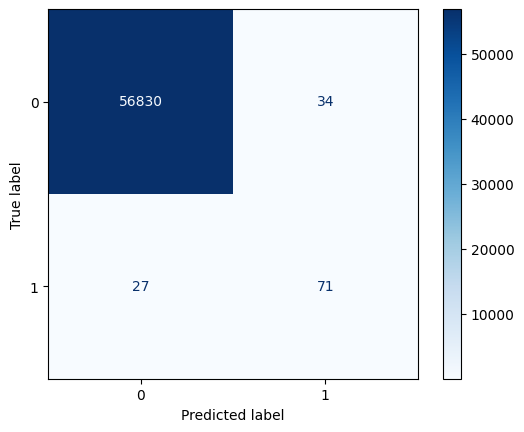

In [19]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_probs_tree = tree_model.predict_proba(X_test)[:, 1]

evaluate_model("Decision Tree", y_test, y_pred_tree, y_probs_tree)
Accuracy_dt = metrics.accuracy_score(y_test, y_pred_tree)
dt_roc_value = roc_auc_score(y_test, y_probs_tree)
import pickle
with open("Descisiontree_model.pkl", "wb") as f:
    pickle.dump(tree_model, f)

**AdaBoost (Adaptive Boosting)**
AdaBoost is an ensemble learning technique that combines multiple weak learners—typically decision trees—into a single, strong classifier. It works by sequentially training weak learners, with each new learner focusing more on the misclassified examples from previous rounds. In fraud detection, AdaBoost is powerful because it can boost the performance of simple models by reducing bias and variance, making it effective for handling imbalanced datasets where fraudulent transactions are rare but critical to detect.

In [20]:
import sklearn
print(sklearn.__version__)

1.6.1



🧠 Model: AdaBoost
Accuracy: 0.9990168884519505
ROC AUC Score: 0.9792300713194675
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.73      0.72        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

CPU times: total: 2min 22s
Wall time: 2min 22s


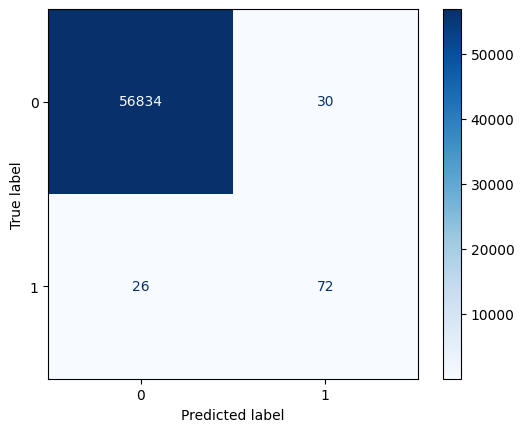

In [21]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Light-weight base model
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    random_state=42
)
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)
y_probs_ada = ada_model.predict_proba(X_test)[:, 1]

evaluate_model("AdaBoost", y_test, y_pred_ada, y_probs_ada)

Accuracy_ada = metrics.accuracy_score(y_test, y_pred_ada)
ada_roc_value = roc_auc_score(y_test, y_probs_ada)

import pickle
with open("ada_model.pkl", "wb") as f:
    pickle.dump(ada_model, f)


**RANDOM FOREST CLASSIFIER:**


🧠 Model: Random forest classifier
Accuracy: 0.9995084442259752
ROC AUC Score: 0.9529075998013161
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

<class 'pandas.core.frame.DataFrame'>
CPU times: total: 2min 12s
Wall time: 2min 12s


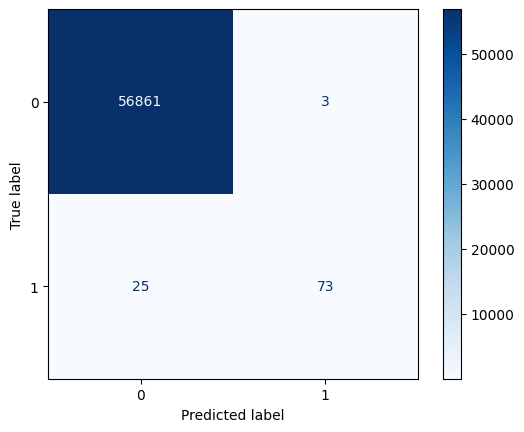

In [22]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Step 2: Fit the model
rf_model.fit(X_train, y_train)

# Step 3: Predict
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

evaluate_model("Random forest classifier", y_test, y_pred_rf, y_probs_rf)

print(type(X_test))

import pickle
with open("randomtree.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [23]:
"""# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()"""

"# Plot ROC Curve\nfpr, tpr, _ = roc_curve(y_test, y_probs_rf)\nplt.figure(figsize=(8,6))\nplt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')\nplt.plot([0,1], [0,1], 'k--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve - Random Forest')\nplt.legend()\nplt.grid()\nplt.show()"

In [24]:
import joblib

# Save model
#joblib.dump(log_model, 'logistic_model.pkl')


In [25]:
#joblib.dump(tree_model, 'Descisiontree_model.pkl')

In [26]:
#joblib.dump(ada_model, 'ada_model.pkl')

In [ ]:
"""datae= [[25, 50000, 1]]
columnse = ['age', 'income', 'gender']
defefe= pd.DataFrame(datae, columns=columnse)
print(type(defefe))
"""

<class 'pandas.core.frame.DataFrame'>


In [28]:
import pickle
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Save it
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)


c:\Users\Admin\Desktop\python_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
import pickle

# Save X_test and y_test
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
